In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob

## Prepare dataset directory

In [2]:
GLOB_DATA_STRAIGHT = '/data/railroad/data/data_s**0.csv'
LANE_DATA_STRAIGHT = '/data/railroad/data/lane_data_s.csv'

GLOB_DATA_CURVED = '/data/railroad/data/data_c**0.csv'
LANE_DATA_CURVED = '/data/railroad/data/lane_data_c.csv'

RAIL_CONDITION = ['straight', 'curved']
NONLINEAR_CONDITION = ['30', '40', '50', '70', '100']

dir_data_straight = glob(GLOB_DATA_STRAIGHT)
dir_data_curved = glob(GLOB_DATA_CURVED)

In [8]:
dir_data_straight

['/data/railroad/data/data_s100.csv',
 '/data/railroad/data/data_s30.csv',
 '/data/railroad/data/data_s40.csv',
 '/data/railroad/data/data_s50.csv',
 '/data/railroad/data/data_s70.csv']

In [21]:
for dir in dir_data_straight:
    df_vib = pd.read_csv(dir).set_index(keys=['Distance'], inplace=False)
    df_lane = pd.read_csv(LANE_DATA_STRAIGHT).set_index(keys=['Distance'], inplace=False)
    print(len(df_vib), len(df_lane))
    df_concat = pd.concat([df_vib, df_lane], axis=1).sort_index(ascending=True)
    print(len(df_concat))

12000 12000
12000
12000 12000
12000
12000 12000
12000
12000 12000
12000
12000 12000
12000


In [22]:
for dir in dir_data_curved:
    df_vib = pd.read_csv(dir).set_index(keys=['Distance'], inplace=False)
    df_lane = pd.read_csv(LANE_DATA_STRAIGHT).set_index(keys=['Distance'], inplace=False)
    print(len(df_vib), len(df_lane))
    df_concat = pd.concat([df_vib, df_lane], axis=1).sort_index(ascending=True)
    print(len(df_concat))

12000 12000
12000
12000 12000
12000
12000 12000
12000
12000 12000
12000
12000 12000
12000


In [3]:
tmp_list_dir_data = [dir_data_straight, dir_data_curved]
dict_data_dir = {
    'straight' : dir_data_straight,
    'curved' : dir_data_curved
}

# list of data directory to dictionary depending on the non-linear condition
for key, value in dict_data_dir.items():

    tmp_dict_data_dir = dict()
    for cond in NONLINEAR_CONDITION:  # [30, 40, 50, 70, 100]
        for dir in value:  # ['/data/railroad/data/data_s100.csv', '/data/railroad/data/data_s30.csv', '/data/railroad/data/data_s40.csv', '/data/railroad/data/data_s50.csv', '/data/railroad/data/data_s70.csv']
            if str(cond) in dir:
                tmp_dict_data_dir[str(cond)] = dir
    
    # update list ot dict
    dict_data_dir[key] = tmp_dict_data_dir

In [4]:
dict_data_dir

{'straight': {'30': '/data/railroad/data/data_s30.csv',
  '40': '/data/railroad/data/data_s40.csv',
  '50': '/data/railroad/data/data_s50.csv',
  '70': '/data/railroad/data/data_s70.csv',
  '100': '/data/railroad/data/data_s100.csv'},
 'curved': {'30': '/data/railroad/data/data_c30.csv',
  '40': '/data/railroad/data/data_c40.csv',
  '50': '/data/railroad/data/data_c50.csv',
  '70': '/data/railroad/data/data_c70.csv',
  '100': '/data/railroad/data/data_c100.csv'}}

## Plot signals

In [5]:
# 그래프 그리기
def plot_line_graph(df, x_col, y_col, n_col, current_col):
    plt.subplot(n_col, 1, current_col)
    plt.plot(df[x_col], df[y_col], linewidth=1)
    plt.title(f'{y_col}')
    if current_col != n_col - 1:
        plt.xticks([])  # X 축 눈금 없애기
    plt.ylabel(y_col)
    plt.grid(True)
    

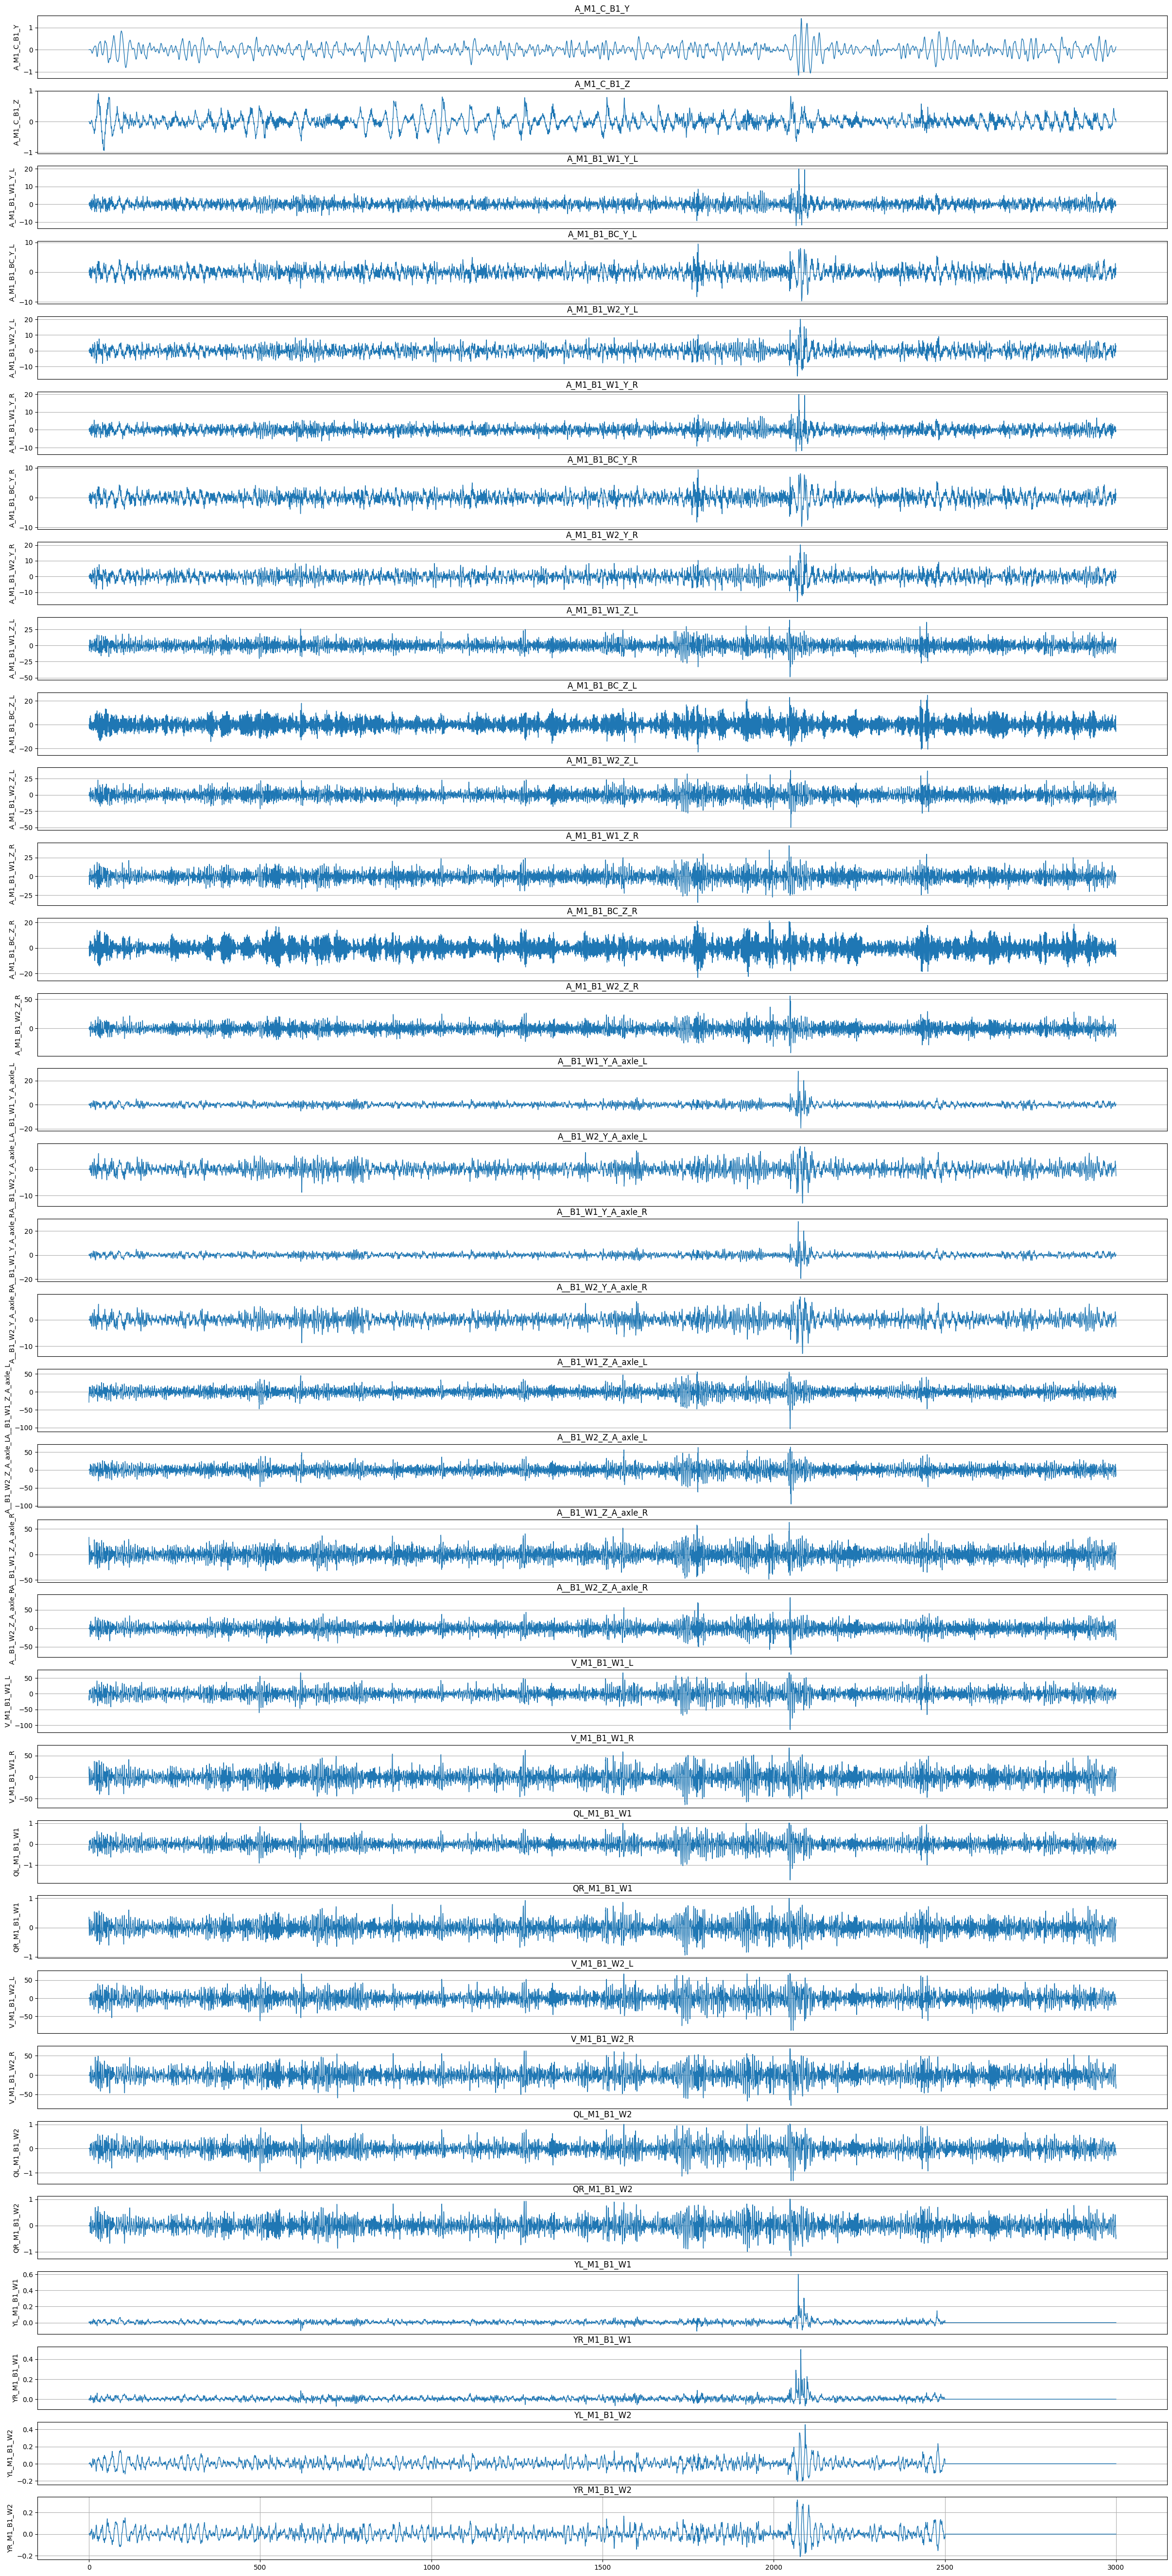

In [19]:
# 각 컬럼에 대한 라인 그래프 그리기
df = pd.read_csv(dict_data_dir['straight']['30'])
columns_to_plot = df.keys()
x_column = 'Distance'
plt.figure(figsize=(30, 70))
_counter = 1
for col in columns_to_plot:
    if col != "Distance":
        plot_line_graph(df, x_column, col, len(columns_to_plot), _counter)
        _counter += 1
plt.show()

## Get merged dataframe for statics

In [7]:
list_df_trn = list()
list_df_test = list()
for cond_rail in RAIL_CONDITION:
    for cond_non in NONLINEAR_CONDITION:
        df = pd.read_csv(dict_data_dir[cond_rail][cond_non])
        df["is_curved"] = (cond_rail == 'curved') * 1.0
        df["yaw_damper"] = int(cond_non)
        df["data_dir"] = dict_data_dir[cond_rail][cond_non]
        list_df_trn.append(df[df['Distance'] <= 2500])
        list_df_test.append(df[df['Distance'] > 2500])

In [8]:
len(list_df_trn)

10

In [9]:
df_trn = pd.concat(list_df_trn, ignore_index=True)
df_test = pd.concat(list_df_test, ignore_index=True)

In [10]:
len(df_trn['data_dir'])

100010

In [11]:
df_test['data_dir']

0         /data/railroad/data/data_s30.csv
1         /data/railroad/data/data_s30.csv
2         /data/railroad/data/data_s30.csv
3         /data/railroad/data/data_s30.csv
4         /data/railroad/data/data_s30.csv
                       ...                
19985    /data/railroad/data/data_c100.csv
19986    /data/railroad/data/data_c100.csv
19987    /data/railroad/data/data_c100.csv
19988    /data/railroad/data/data_c100.csv
19989    /data/railroad/data/data_c100.csv
Name: data_dir, Length: 19990, dtype: object

In [12]:
df_test.describe()

,Distance,A_M1_C_B1_Y,A_M1_C_B1_Z,A_M1_B1_W1_Y_L,A_M1_B1_BC_Y_L,A_M1_B1_W2_Y_L,A_M1_B1_W1_Y_R,A_M1_B1_BC_Y_R,A_M1_B1_W2_Y_R,A_M1_B1_W1_Z_L,...,V_M1_B1_W2_L,V_M1_B1_W2_R,QL_M1_B1_W2,QR_M1_B1_W2,YL_M1_B1_W1,YR_M1_B1_W1,YL_M1_B1_W2,YR_M1_B1_W2,is_curved,yaw_damper
count,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,...,19990.000000,19990.000000,19990.000000,19990.000000,19990.0,19990.0,19990.0,19990.0,19990.000000,19990.000000
mean,2750.000000,-0.001159,0.001869,0.002070,0.008489,0.014912,0.002069,0.008489,0.014909,0.007477,...,0.074512,-0.112195,0.001120,-0.001648,0.0,0.0,0.0,0.0,0.500000,58.000000
std,144.268989,0.206972,0.157306,1.773443,1.344239,2.396320,1.773274,1.344017,2.396199,5.864313,...,13.542589,14.031079,0.203471,0.206061,0.0,0.0,0.0,0.0,0.500013,24.819968
min,2500.250000,-0.609900,-0.353500,-5.775000,-4.535000,-8.899000,-5.773000,-4.536000,-8.895000,-19.120000,...,-42.530000,-41.500000,-0.638900,-0.609400,0.0,0.0,0.0,0.0,0.000000,30.000000
25%,2625.000000,-0.143875,-0.124900,-1.105750,-0.908575,-1.584000,-1.106000,-0.907325,-1.585000,-4.123000,...,-9.200500,-9.755000,-0.138200,-0.143300,0.0,0.0,0.0,0.0,0.000000,40.000000
50%,2750.000000,-0.004336,-0.007125,0.038296,0.012429,0.103500,0.037962,0.012148,0.102650,-0.040397,...,0.080522,-0.171850,0.001210,-0.002524,0.0,0.0,0.0,0.0,0.500000,50.000000
75%,2875.000000,0.142800,0.122200,1.116000,0.908475,1.646000,1.115750,0.907900,1.645000,3.741750,...,9.055750,9.095500,0.136075,0.133600,0.0,0.0,0.0,0.0,1.000000,70.000000
max,2999.750000,0.612800,0.456700,7.330000,4.330000,7.320000,7.332000,4.333000,7.326000,21.960000,...,44.430000,52.370000,0.667500,0.769100,0.0,0.0,0.0,0.0,1.000000,100.000000
